## This file contains the code for [Kaggle's Titanic prediction competition](https://www.kaggle.com/c/titanic/overview/description) where the goal was to predict if a passanger has survived the sinking or not (Classification problem). 


### Table of Contents

* [1 - Initial steps](#1)
    * [1.1 - Importing the data](#1.1)
    * [1.2 - Exploring the dataset](#1.2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)



## 1- Initial steps <a class="anchor" id="1"></a>
### 1.1 - Importing the data <a class="anchor" id="1.1"></a> 
The dataset available for the competition was already divided into [test](https://www.kaggle.com/c/titanic/data?select=test.csv) and [train](https://www.kaggle.com/c/titanic/data?select=train.csv) samples. The first step is to import both dataset into the notebook into a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame).

In [1]:
# import pandas
import pandas as pd

#importing the train and test dataset
train = pd.read_csv('data/train.csv', sep=',')

#Print the first rows to see if the dataset was imported correctly
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
#import the test dataset
test = pd.read_csv('data/test.csv', sep=',')

#Print the first rows to see if the dataset was imported correctly
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


### 1.2 - Exploring the dataset <a class="anchor" id="1.2"></a>
That dataset was successfully imported into the train and test dataset. Now we can begin exploring the dataset. A good practice is to build a data dictionary so we can others can clearly understand what each column in our dataset is representing. Before building our data dictionary, let's see which columns we have in both datasets. We can use the [.columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html?highlight=columns#pandas.DataFrame.columns) or [.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method from pandas.

In [3]:
columns_train = list(train.columns)
columns_test = list(test.columns)

print("train dataset columns: ", columns_train)
print("test dataset columns: ", columns_test)

train dataset columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
test dataset columns:  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
print("Train dataset info:")
print(train.info())
print("\n\nTest dataset info:")
print(test.info())

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

We can see that for the test dataset the column 'Survived' (target) was not provided. This is because our model has to predict the outcome. Usually, the ground truth, or the target column, is provided so we can measure our model against the unseen data, but for the Kaggle competition, normally we submit our prediction and they would compare our measures against the ground truth and rate the performance of your model using the appropriate metrics. That being said, let's now build our data dictionary. I will divide the dictionary into features(columns) which are the measured inputs of the problem domain, the independdent variables, and target which is the dependent variable or the measure we're trying to model or forecast [ref](https://datascience.stackexchange.com/questions/38188/classifying-data-in-orange-whats-the-difference-between-features-target-va).

------
**<font color='blue'>Target</font>**:

| **Column** | **Description** | **Key** | **Type** |
| :-: | :-: | :-: | :-: |
| *Survived* | If the passanger had survived or not | 0 = No; 1 = Yes | int64 |

**<font color='red'>Features</font>**:

| **Column** | **Description** | **Key** | **Type** |
| :-: | :-: | :-: | :-: |
| *PassengerId* | Unique Id to identify a passenger |  | int64 |
| *Pclass* | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | int64 |
| *Name* | Passanger Name |  | object |
| *Sex* | Passenger biologic sex | Male, Female | object |
| *Age* | Passenger age |  | float64 |
| *SibSp* | Number of siblings / spouses aboard the Titanic |  | int64 |
| *Parch* | Number of parents / children aboard the Titanic |  | int64 |
| *Ticket* | Ticket number |  | object |
| *Fare* | Passenger fare |  | float64 |
| *Cabin* | Cabin number |  | object |
| *Embarked* | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | object |

Our next step is towards to try to identify which of this features would be resonable responsible for the survival or not of the passenger. 

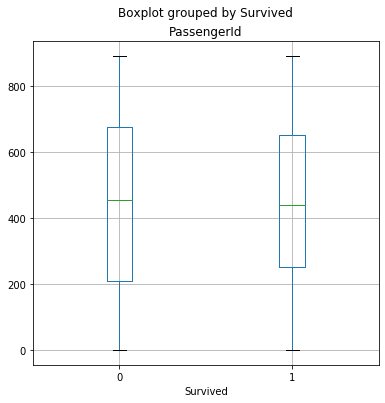

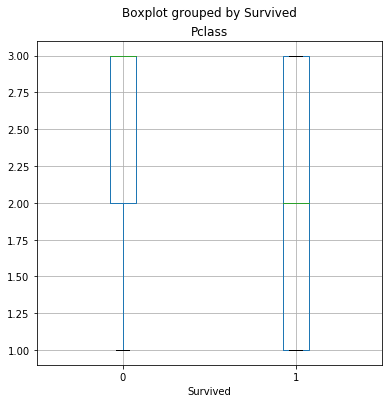

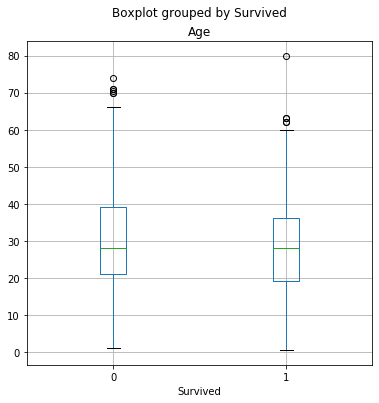

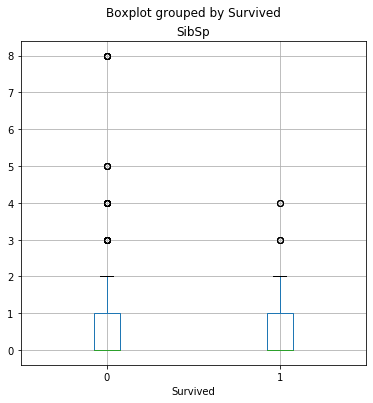

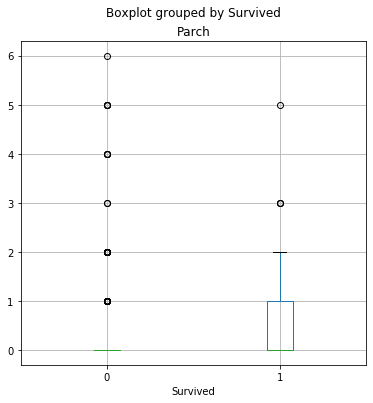

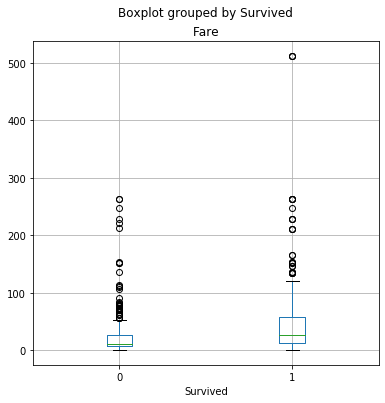

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

numeric_features = ["PassengerId","Pclass","Age","SibSp","Parch", "Fare" ]
for col in numeric_features:
    train.boxplot(column=col, by="Survived", figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticable difference in the distribution for each label value. In particular, **Fare**, **Pclass**, and **Age** show markedly different distributions for survived passengers than for non-survived passengers.

In [6]:
for df in [train,test]:
    df['Sex_binary']=df['Sex'].map({'male':1,'female':0})

Drop the columns we don't need for the model

In [7]:
# dropping all the columns that we are not gonna used in this analysis
for df in [train,test]:
    df.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', "Sex"],axis=1, inplace=True)

Inspecting the data for null values and handling them

In [8]:
# inspecting the data for missing values
print("train:")
print(train.isnull().sum())
print("\ntest:")
print(test.isnull().sum())

train:
PassengerId      0
Survived         0
Pclass           0
Age            177
Sex_binary       0
dtype: int64

test:
PassengerId     0
Pclass          0
Age            86
Sex_binary      0
dtype: int64


Assuming that people that has a missing value as 'Age', was less than 1 year old, so we are just gonna impute these values as '0'.

In [9]:
# I should divide into two dataframes, one with the impute 0 and another one just dropping the values.
# replace the missing values with 0
train_impute = train
test_impute = test

train_impute.Age.fillna(0, inplace=True)
test_impute.Age.fillna(0, inplace=True)
# just deleting the missing values
train_drop = train
test_drop = test

train_drop.Age.dropna()
test_drop.Age.dropna()
# check if the replacement was successfull
print("train_impute:")
print(train_impute.isnull().sum())
print("\ntrain_drop:")
print(train_drop.isnull().sum())

print("\ntest_impute:")
print(test_impute.isnull().sum())
print("\ntest_drop:")
print(test_drop.isnull().sum())

train_impute:
PassengerId    0
Survived       0
Pclass         0
Age            0
Sex_binary     0
dtype: int64

train_drop:
PassengerId    0
Survived       0
Pclass         0
Age            0
Sex_binary     0
dtype: int64

test_impute:
PassengerId    0
Pclass         0
Age            0
Sex_binary     0
dtype: int64

test_drop:
PassengerId    0
Pclass         0
Age            0
Sex_binary     0
dtype: int64


In [10]:
# Separating the label and the features on the train dataset
#imputed dataset
X_train_impute = train_impute.drop('Survived', axis=1)
y_train_impute = train_impute.Survived

#dropped dataset
X_train_drop = train_drop.drop('Survived', axis=1)
y_train_drop = train_drop.Survived


Trying a few classification algorithms:
* logistic regression
* support vector machine
* random forest classifier

Logistic Regression:

In [11]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear', random_state=42)
model_lr.fit(X_train_impute, y_train_impute)
predictions = model_lr.predict(test_impute)

In [15]:
def generate_submission_file(predictions, model_name=''):
    #building the submission file
    submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
    #Visualize the first 5 rows
    submission.head()
    #Convert DataFrame to a csv file that can be uploaded
    #This is saved in the same directory as your notebook
    filename = 'TitanicPredictions'+model_name.capitalize()+'.csv'
    submission.to_csv(filename,index=False)
    print('Saved file: ' + filename)

In [16]:
# calling the function to generate the submission file
generate_submission_file(predictions, model_name='LogReg')

Saved file: TitanicPredictionsLogreg.csv


Kaggle Score: 0.76315. According to Kaggle, my score represents my submission's accuracy. For example, a score of 0.7 in this competition indicates my model predicted Titanic survival correctly for 70% of people. In thisn case 76,31% of people.

In [17]:
#Logistic Regression on dropped data
model_lr.fit(X_train_drop, y_train_drop)
predictions = model_lr.predict(test_drop)
generate_submission_file(predictions, model_name='LogReg_drop')

Saved file: TitanicPredictionsLogreg_drop.csv


Kaggle Score: 0.76315. We achieved the same accuracy score for both imputed and dropped models, which indicates that for this dataset it doesn't make a difference how we handle the missing values, this doen't not affect the performance of the model.

Support Vector Machine:

In [18]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train_impute,y_train_impute)
predictions_svm = model_svm.predict(test_impute)
generate_submission_file(predictions_svm, 'SVM')

Saved file: TitanicPredictionsSvm.csv


Kaggle Score: 0.62200. Support Vector Machine algorithm performed worst than the Logistic Regression used previously. However, I used only the default configuration for the model. Maybe if we tune the hyperparameters we could get a better result.


Random Forest Classifier:


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_impute, y_train_impute)
predictions_rfc = model.predict(test_impute)
generate_submission_file(predictions_rfc, 'rfc')

Saved file: TitanicPredictionsRfc.csv


Kaggle Score: 0.75837. Random Forest Classifier had a better performance than the SVM algorithm, but it is still behind the Logistic Regression algorithm. Again, I used the default configuration and maybe if I chage the right parameters, this could made this could improve the performance of this model.